In [1]:
from __future__ import print_function
import os
import pandas as pd
%matplotlib inline
from matplotlib import pyplot as plt

In [2]:
os.chdir('E:/Practical Time Series')

In [3]:
beer_df = pd.read_csv('datasets/quarterly-beer-production-in-aus-March 1956-June 1994.csv')
beer_df.index = beer_df['Quarter']

In [4]:
print('Shape of the dataframe:', beer_df.shape)

Shape of the dataframe: (155, 2)


In [5]:
beer_df.head(10)

,Quarter,Quarterly beer production in Australia: megalitres. March 1956 ? June 1994
Quarter,,
1956Q1,1956Q1,284.4
1956Q2,1956Q2,212.8
1956Q3,1956Q3,226.9
1956Q4,1956Q4,308.4
1957Q1,1957Q1,262.0
1957Q2,1957Q2,227.9
1957Q3,1957Q3,236.1
1957Q4,1957Q4,320.4
1958Q1,1958Q1,271.9


In [6]:
beer_df.rename(columns={'Quarterly beer production in Australia: megalitres. March 1956 ? June 1994': 'Beer_Prod' },
               inplace=True
              )

In [7]:
beer_df.head()

,Quarter,Beer_Prod
Quarter,,
1956Q1,1956Q1,284.4
1956Q2,1956Q2,212.8
1956Q3,1956Q3,226.9
1956Q4,1956Q4,308.4
1957Q1,1957Q1,262.0


In [8]:
missing = (pd.isnull(beer_df['Quarter'])) | (pd.isnull(beer_df['Beer_Prod']))
print('Number of rows with at least one missing values:', missing.sum())
beer_df = beer_df.loc[~missing, :]
print('Shape after removing missing values:', beer_df.shape)

Number of rows with at least one missing values: 1
Shape after removing missing values: (154, 2)


In [9]:
MA4 = beer_df['Beer_Prod'].rolling(window=4).mean()
TwoXMA4 = MA4.rolling(window=2).mean()
TwoXMA4 = TwoXMA4.loc[~pd.isnull(TwoXMA4)]

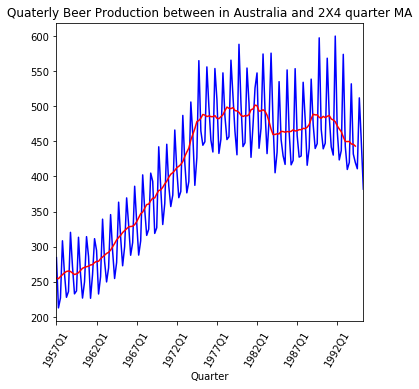

In [10]:
fig = plt.figure(figsize=(5.5, 5.5))
ax = fig.add_subplot(1,1,1)
beer_df['Beer_Prod'].plot(ax=ax, color='b', linestyle='-')
TwoXMA4.plot(ax=ax, color='r', linestyle='-')
plt.xticks(rotation=60)
ax.set_title('Quaterly Beer Production between in Australia and 2X4 quarter MA')
plt.savefig('plots/Section 2/_02_15.png', format='png', dpi=300)

In [12]:
residuals = beer_df['Beer_Prod']-TwoXMA4
residuals = residuals.loc[~pd.isnull(residuals)]

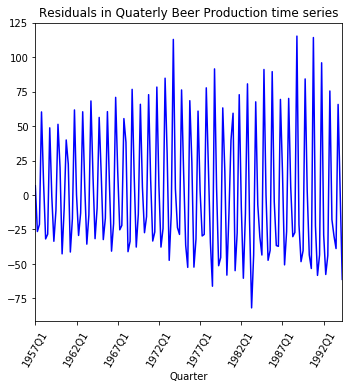

In [13]:
fig = plt.figure(figsize=(5.5, 5.5))
ax = fig.add_subplot(1,1,1)
residuals.plot(ax=ax, color='b', linestyle='-')
plt.xticks(rotation=60)
ax.set_title('Residuals in Quaterly Beer Production time series')
plt.savefig('plots/Section 2/_02_16.png', format='png', dpi=300)

In [15]:
from pandas.plotting import autocorrelation_plot

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\pyplot.py:959: UserWarning: Requested projection is different from current axis projection, creating new axis with requested projection.
  return gcf().gca(**kwargs)


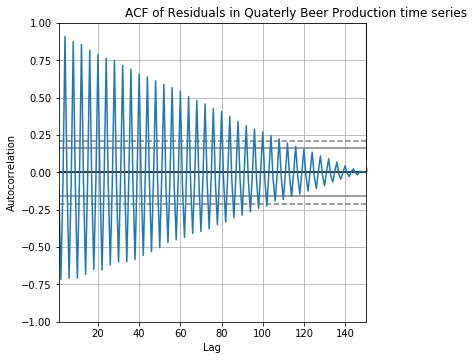

In [16]:
fig = plt.figure(figsize=(5.5, 5.5))
ax = fig.add_subplot(2,2,2)
autocorrelation_plot(residuals, ax=ax)
ax.set_title('ACF of Residuals in Quaterly Beer Production time series')
plt.savefig('plots/Section 2/_02_17.png', format='png', dpi=300)
autocorrelation_plot(residuals)

In [17]:
residuals_qtr_diff = residuals.diff(4)

In [18]:
residuals_qtr_diff = residuals_qtr_diff.loc[~pd.isnull(residuals_qtr_diff)]

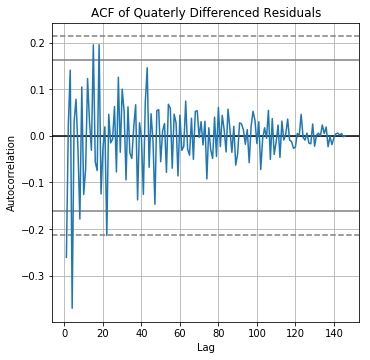

In [19]:
fig = plt.figure(figsize=(5.5, 5.5))
ax = fig.add_subplot(1,1,1)
autocorrelation_plot(residuals_qtr_diff, ax=ax)
ax.set_title('ACF of Quaterly Differenced Residuals')
plt.savefig('plots/Section 2/_02_18.png', format='png', dpi=300)